In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
import pickle

In [2]:
# Load the dataset
file_path = '../data/transaction_detail.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
selected_columns = ['Transaction_Amount', 'Session_Duration', 'Frequency_of_Transactions', 
                     'Unusual_Time_of_Transaction', 'Unusual_Transaction_Amounts', 'Fraud_Label']
selected_df = df[selected_columns]

# Split the data into features (X) and target variable (y)
X = selected_df.drop('Fraud_Label', axis=1)
y = selected_df['Fraud_Label']

In [3]:
# Extract numerical values from 'Session_Duration' column
X['Session_Duration'] = X['Session_Duration'].str.extract('(\d+)').astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Build the neural network model
model_nn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [5]:
# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/10
2/2 - 1s - loss: 0.6891 - accuracy: 0.7000 - val_loss: 0.5941 - val_accuracy: 0.6364 - 1s/epoch - 692ms/step
Epoch 2/10
2/2 - 0s - loss: 0.6574 - accuracy: 0.7000 - val_loss: 0.5715 - val_accuracy: 0.6364 - 39ms/epoch - 19ms/step
Epoch 3/10
2/2 - 0s - loss: 0.6292 - accuracy: 0.7000 - val_loss: 0.5495 - val_accuracy: 0.7273 - 41ms/epoch - 21ms/step
Epoch 4/10
2/2 - 0s - loss: 0.5993 - accuracy: 0.7500 - val_loss: 0.5301 - val_accuracy: 0.7273 - 56ms/epoch - 28ms/step
Epoch 5/10
2/2 - 0s - loss: 0.5776 - accuracy: 0.8000 - val_loss: 0.5117 - val_accuracy: 0.8182 - 42ms/epoch - 21ms/step
Epoch 6/10
2/2 - 0s - loss: 0.5543 - accuracy: 0.8250 - val_loss: 0.4932 - val_accuracy: 0.9091 - 46ms/epoch - 23ms/step
Epoch 7/10
2/2 - 0s - loss: 0.5308 - accuracy: 0.8250 - val_loss: 0.4761 - val_accuracy: 0.9091 - 41ms/epoch - 21ms/step
Epoch 8/10
2/2 - 0s - loss: 0.5093 - accuracy: 0.8500 - val_loss: 0.4585 - val_accuracy: 0.9091 - 41ms/epoch - 20ms/step
Epoch 9/10
2/2 - 0s - loss: 0.486

In [6]:
# Save the model to a pickle file
with open('neural_network_model.pkl', 'wb') as model_file:
    pickle.dump(model_nn, model_file)

In [7]:
# Evaluate the model on the test set
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 193ms/step


In [8]:
# Print accuracy and other metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)


In [9]:
print(f"Neural Network Accuracy: {accuracy_nn}")
print("Neural Network Confusion Matrix:\n", conf_matrix_nn)
print("Neural Network Classification Report:\n", class_report_nn)


Neural Network Accuracy: 0.8461538461538461
Neural Network Confusion Matrix:
 [[10  0]
 [ 2  1]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.33      0.50         3

    accuracy                           0.85        13
   macro avg       0.92      0.67      0.70        13
weighted avg       0.87      0.85      0.81        13



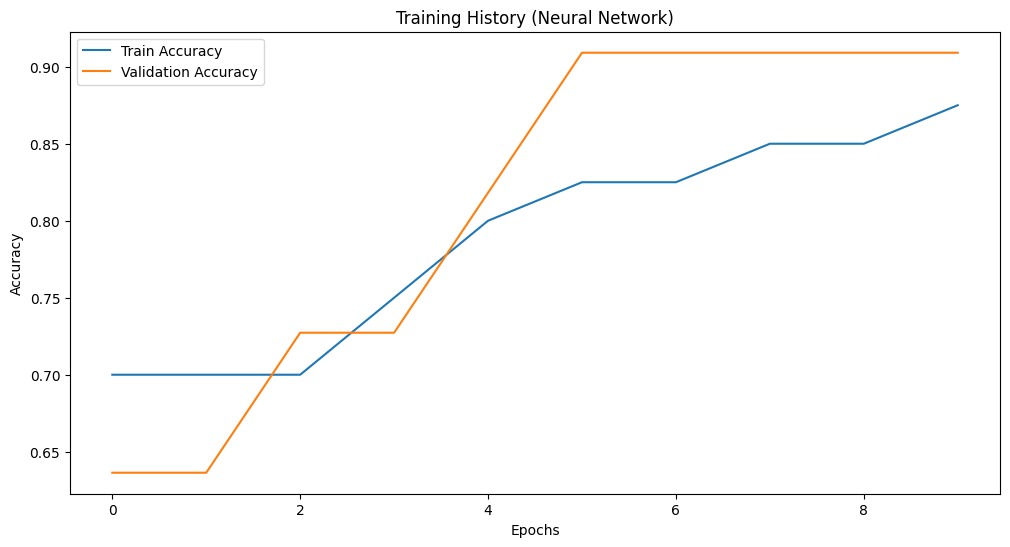

In [10]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History (Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Load the model from the pickle file
with open('neural_network_model.pkl', 'rb') as model_file:
    loaded_model_nn = pickle.load(model_file)

In [12]:
new_input_data = {
    'Transaction_Amount': [1500],
    'Session_Duration': [500],
    'Frequency_of_Transactions': [7],
    'Unusual_Time_of_Transaction': [0],
    'Unusual_Transaction_Amounts': [0]
}

In [13]:
new_input = pd.DataFrame(new_input_data)


In [14]:
new_input_scaled = scaler.transform(new_input)
new_input_prediction = (loaded_model_nn.predict(new_input_scaled) > 0.5).astype("int32")



1/1 [==============================] - 0s 161ms/step


In [15]:
print(f"Neural Network Fraud Prediction for New Input: {new_input_prediction}")


Neural Network Fraud Prediction for New Input: [[0]]
